In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq

# %matplotlib widget

In [2]:
df = pd.read_csv('Power Anomalies Simulations Data/AD3_data/noise_200Hz_inthemiddle_copy.csv', sep=';')
# pd.read_csv('Power Anomalies Simulations Data/AD3_data/01_Power_failure_10sec.csv', sep=';')
df

,Name,I_L1real,Name.1,I_L2real,Name.2,I_L3real,Name.3,U_L1real,Name.4,U_L2real,Name.5,U_L3real
0,133456465859060000,-0.006048,133456465859060000,-0.007392,133456465859060000,-0.005376,133456465859060000,-0.0450,133456465859060000,-0.0450,1.334565e+17,-0.0450
1,133456465859060500,-0.003360,133456465859060500,-0.003360,133456465859060500,-0.002688,133456465859060500,0.0000,133456465859060500,0.0450,1.334565e+17,0.0000
2,133456465859061000,-0.001344,133456465859061000,0.000672,133456465859061000,0.000672,133456465859061000,0.0225,133456465859061000,0.0000,1.334565e+17,0.0000
3,133456465859061500,0.001344,133456465859061500,0.004704,133456465859061500,0.002688,133456465859061500,0.0000,133456465859061500,0.0225,1.334565e+17,0.0000
4,133456465859062000,0.005376,133456465859062000,0.004032,133456465859062000,0.006720,133456465859062000,0.0000,133456465859062000,0.0225,1.334565e+17,0.0225
...,...,...,...,...,...,...,...,...,...,...,...,...
552132,133456466135126000,0.170688,133456466135126000,0.171360,133456466135126000,0.171360,133456466135126000,0.1575,133456466135126000,0.1575,1.334565e+17,0.1350
552133,133456466135126500,0.170016,133456466135126500,0.172032,133456466135126500,0.170016,133456466135126500,0.1350,133456466135126500,0.1575,1.334565e+17,0.1125
552134,133456466135127000,0.166656,133456466135127000,0.170016,133456466135127000,0.170016,133456466135127000,0.1350,133456466135127000,0.1575,1.334565e+17,0.1575
552135,133456466135127500,0.165984,133456466135127500,0.168672,133456466135127500,0.167328,133456466135127500,0.1575,133456466135127500,0.1575,1.334565e+17,0.1575


In [3]:
df = df.dropna()
df = df.drop(df.filter(regex='Name..').columns, axis=1)
df = df.rename(columns={"Name": "Time"})
df

,Time,I_L1real,I_L2real,I_L3real,U_L1real,U_L2real,U_L3real
0,133456465859060000,-0.006048,-0.007392,-0.005376,-0.0450,-0.0450,-0.0450
1,133456465859060500,-0.003360,-0.003360,-0.002688,0.0000,0.0450,0.0000
2,133456465859061000,-0.001344,0.000672,0.000672,0.0225,0.0000,0.0000
3,133456465859061500,0.001344,0.004704,0.002688,0.0000,0.0225,0.0000
4,133456465859062000,0.005376,0.004032,0.006720,0.0000,0.0225,0.0225
...,...,...,...,...,...,...,...
552131,133456466135125500,0.169344,0.172032,0.171360,0.1575,0.1575,0.1575
552132,133456466135126000,0.170688,0.171360,0.171360,0.1575,0.1575,0.1350
552133,133456466135126500,0.170016,0.172032,0.170016,0.1350,0.1575,0.1125
552134,133456466135127000,0.166656,0.170016,0.170016,0.1350,0.1575,0.1575


In [4]:
df.isna().sum()

Time        0
I_L1real    0
I_L2real    0
I_L3real    0
U_L1real    0
U_L2real    0
U_L3real    0
dtype: int64

In [5]:
def LDAP_to_time(timestamp):

    value = datetime.datetime(1601, 1, 1) + datetime.timedelta(seconds=timestamp/10000000)

    return (value.strftime('%Y-%m-%d %H:%M:%S.%f'))


df['Time'] = df['Time'].map(lambda x: LDAP_to_time(x))
df.head(20)

,Time,I_L1real,I_L2real,I_L3real,U_L1real,U_L2real,U_L3real
0,2023-11-28 12:03:05.906000,-0.006048,-0.007392,-0.005376,-0.0450,-0.0450,-0.0450
1,2023-11-28 12:03:05.906050,-0.003360,-0.003360,-0.002688,0.0000,0.0450,0.0000
2,2023-11-28 12:03:05.906099,-0.001344,0.000672,0.000672,0.0225,0.0000,0.0000
3,2023-11-28 12:03:05.906151,0.001344,0.004704,0.002688,0.0000,0.0225,0.0000
4,2023-11-28 12:03:05.906200,0.005376,0.004032,0.006720,0.0000,0.0225,0.0225
5,2023-11-28 12:03:05.906250,0.007392,0.009408,0.008736,0.0000,0.0000,0.0225
6,2023-11-28 12:03:05.906300,0.009408,0.011424,0.012096,0.0225,0.0000,0.0225
7,2023-11-28 12:03:05.906349,0.013440,0.014112,0.016800,0.0450,0.0000,0.0000
8,2023-11-28 12:03:05.906401,0.018144,0.018144,0.016800,0.0225,0.0000,0.0000
9,2023-11-28 12:03:05.906450,0.018144,0.020160,0.020160,0.0225,0.0450,0.0000


In [6]:
sampling_frequency = 20e+03                             # 20 kHz
sampling_rate = (1/sampling_frequency)         # every 50 microseconds
total_samples = len(df)

microseconds_passed = np.arange(start=0, stop=(sampling_rate*total_samples), step=sampling_rate)

microseconds_passed

array([0.000000e+00, 5.000000e-05, 1.000000e-04, ..., 2.760665e+01,
       2.760670e+01, 2.760675e+01])

In [7]:
df['microseconds_passed'] = microseconds_passed

df.head(20)

,Time,I_L1real,I_L2real,I_L3real,U_L1real,U_L2real,U_L3real,microseconds_passed
0,2023-11-28 12:03:05.906000,-0.006048,-0.007392,-0.005376,-0.0450,-0.0450,-0.0450,0.00000
1,2023-11-28 12:03:05.906050,-0.003360,-0.003360,-0.002688,0.0000,0.0450,0.0000,0.00005
2,2023-11-28 12:03:05.906099,-0.001344,0.000672,0.000672,0.0225,0.0000,0.0000,0.00010
3,2023-11-28 12:03:05.906151,0.001344,0.004704,0.002688,0.0000,0.0225,0.0000,0.00015
4,2023-11-28 12:03:05.906200,0.005376,0.004032,0.006720,0.0000,0.0225,0.0225,0.00020
5,2023-11-28 12:03:05.906250,0.007392,0.009408,0.008736,0.0000,0.0000,0.0225,0.00025
6,2023-11-28 12:03:05.906300,0.009408,0.011424,0.012096,0.0225,0.0000,0.0225,0.00030
7,2023-11-28 12:03:05.906349,0.013440,0.014112,0.016800,0.0450,0.0000,0.0000,0.00035
8,2023-11-28 12:03:05.906401,0.018144,0.018144,0.016800,0.0225,0.0000,0.0000,0.00040
9,2023-11-28 12:03:05.906450,0.018144,0.020160,0.020160,0.0225,0.0450,0.0000,0.00045


In [8]:
# test_df = df[df['Time'].str.contains('12:03:06', case=False)]
# test_df = df.iloc[:2000, :]
test_df = df
test_df.head(20)

,Time,I_L1real,I_L2real,I_L3real,U_L1real,U_L2real,U_L3real,microseconds_passed
0,2023-11-28 12:03:05.906000,-0.006048,-0.007392,-0.005376,-0.0450,-0.0450,-0.0450,0.00000
1,2023-11-28 12:03:05.906050,-0.003360,-0.003360,-0.002688,0.0000,0.0450,0.0000,0.00005
2,2023-11-28 12:03:05.906099,-0.001344,0.000672,0.000672,0.0225,0.0000,0.0000,0.00010
3,2023-11-28 12:03:05.906151,0.001344,0.004704,0.002688,0.0000,0.0225,0.0000,0.00015
4,2023-11-28 12:03:05.906200,0.005376,0.004032,0.006720,0.0000,0.0225,0.0225,0.00020
5,2023-11-28 12:03:05.906250,0.007392,0.009408,0.008736,0.0000,0.0000,0.0225,0.00025
6,2023-11-28 12:03:05.906300,0.009408,0.011424,0.012096,0.0225,0.0000,0.0225,0.00030
7,2023-11-28 12:03:05.906349,0.013440,0.014112,0.016800,0.0450,0.0000,0.0000,0.00035
8,2023-11-28 12:03:05.906401,0.018144,0.018144,0.016800,0.0225,0.0000,0.0000,0.00040
9,2023-11-28 12:03:05.906450,0.018144,0.020160,0.020160,0.0225,0.0450,0.0000,0.00045


Start = 0.0   Stop = 27.60675 microsecond


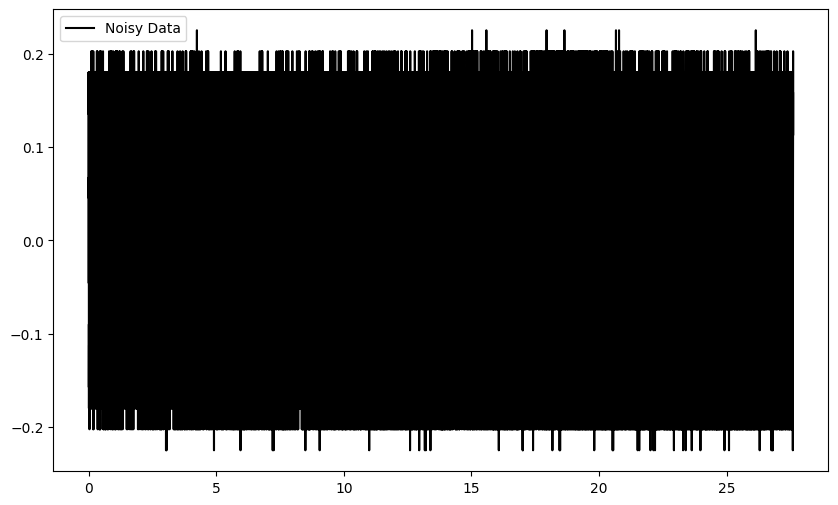

In [9]:
U_L1real = np.array(test_df['U_L1real'])
timestep = np.array(test_df['microseconds_passed'])

print(f'Start = {timestep[0]}   Stop = {timestep[-1]} microsecond')

fig = plt.figure(figsize=(10, 6))
plt.plot(timestep, U_L1real, color='k', label='Noisy Data')

plt.legend()
plt.show()

In [10]:
fourier = fft(U_L1real)

In [11]:
fourier

array([-2232.60750339 -0.j        ,    47.0652275 -86.98211147j,
          89.22238678-72.83679372j, ...,    25.33860535+53.73711611j,
          89.22238678+72.83679372j,    47.0652275 +86.98211147j])

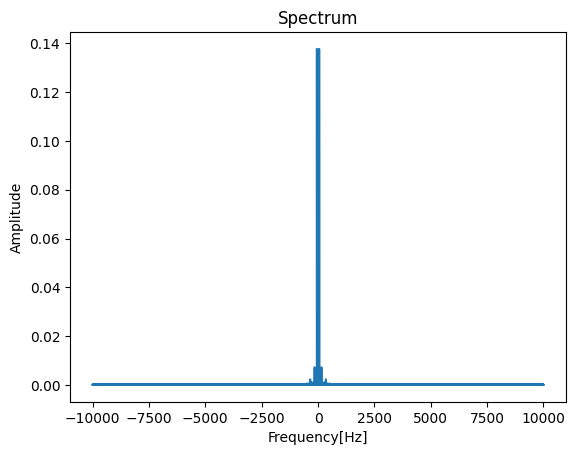

In [12]:
normalize = len(fourier)/2

frequency_axis = fftfreq(len(fourier), d=sampling_rate)
norm_amplitude = np.abs(fourier)/normalize

fig = plt.figure()
plt.plot(frequency_axis, norm_amplitude)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.show()

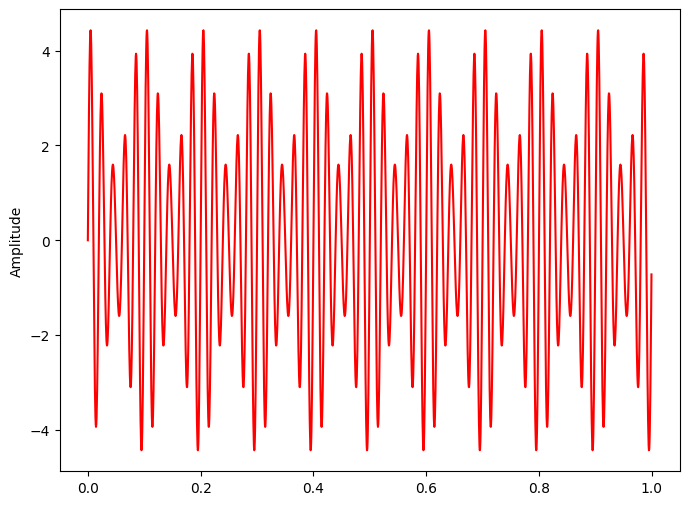

In [20]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 50.
x = 3*np.sin(2*np.pi*freq*t)

freq = 60
x += np.sin(2*np.pi*freq*t)

freq = 40  
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

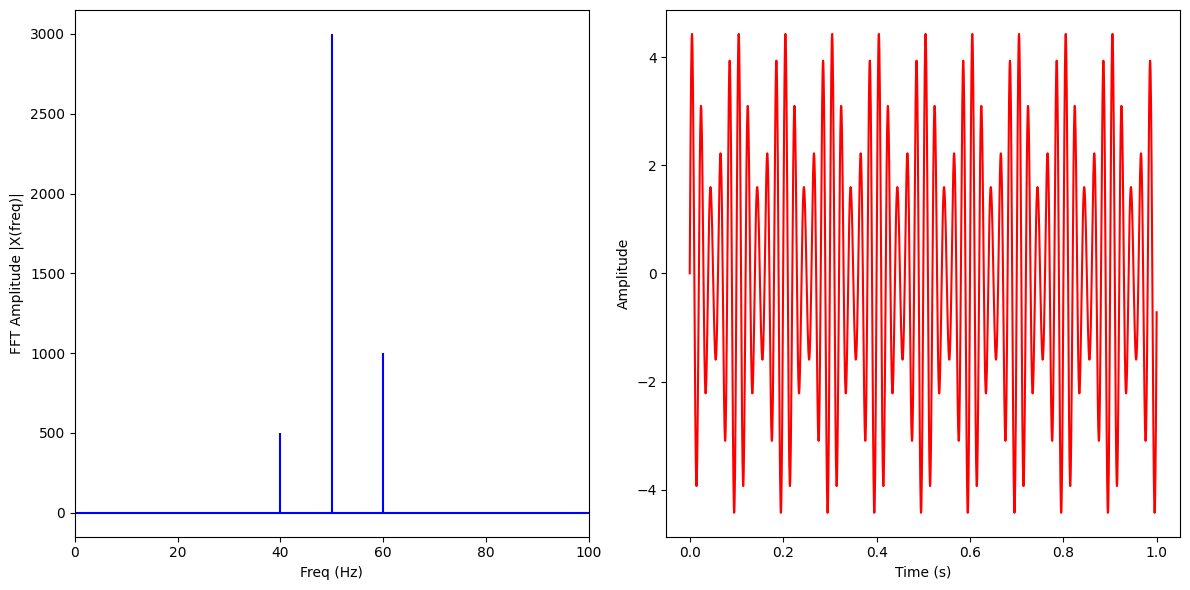

In [21]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 100)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [23]:
print(freq.shape)
print(X.shape)

print(freq)
print(np.abs(X))

type(X)

(2000,)
(2000,)
[0.000e+00 1.000e+00 2.000e+00 ... 1.997e+03 1.998e+03 1.999e+03]
[6.96908905e-13 4.24307915e-13 1.98862581e-12 ... 1.44174223e-12
 1.95314501e-12 4.24307915e-13]


numpy.ndarray

In [28]:
# freq_list = list(np.asarray((45 <= freq).nonzero()))[0]

np.abs(X)[35:45]

array([3.47035124e-12, 1.82371008e-12, 1.58784483e-12, 1.83509021e-13,
       5.30646576e-13, 5.00000000e+02, 1.15369297e-13, 7.82377746e-13,
       2.17638074e-12, 1.44098549e-12])